<a href="https://colab.research.google.com/github/joaquinparodi/TP1-DATOS/blob/main/tp1orga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
!pip install ptitprince
import ptitprince as pt
import pandas as pd
import numpy as np


     |████████████████████████████████| 61kB 2.8MB/s 
  Created wheel for ptitprince: filename=ptitprince-0.2.5-cp36-none-any.whl size=8428 sha256=897d010b41ad7eb84860823a826970d7c89c06790770608b2e21f185d4a0c980
  Stored in directory: /root/.cache/pip/wheels/fb/c1/75/2ef8da161053bdf8e03f9a360f426accd4fac1ddf7f6ed0029
Successfully built ptitprince


In [2]:
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
 
id='1aIyEwjxvHeljU-gu-iQMlHI596nZRPFJ'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('data.csv')

In [6]:
id='1P7Ks8VYeeTpQ7xvpSSYXM_9X4aKAEcGC'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test.csv')

In [8]:
test=pd.read_csv('test.csv')

In [9]:
test

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A
0,6140,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_171,Product_Name_332,EUR,0.325,USD,0.36761,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,162240.0,EUR,367419.0,Prod_Category_A_None
1,6146,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_167,Product_Name_315,EUR,0.320,USD,0.36195,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,78624.0,EUR,367419.0,Prod_Category_A_None
2,6151,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_140,Product_Name_241,EUR,0.275,USD,0.31105,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,126555.0,EUR,367419.0,Prod_Category_A_None
3,6118,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6117,10690,6504,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/25/2019,Person_Name_13,Product_Family_171,Product_Name_328,EUR,0.325,USD,0.36761,6/1/2019,6/28/2019,2019 - 6,Q2,2019,NaT,1,EUR,243360.0,EUR,757783.5,Prod_Category_A_None
4,6124,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6117,10690,6504,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/25/2019,Person_Name_13,Product_Family_167,Product_Name_315,EUR,0.320,USD,0.36195,6/1/2019,6/29/2019,2019 - 6,Q2,2019,NaT,0,EUR,157248.0,EUR,757783.5,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,16345,EMEA,KSA,1,1,0,0,0,Bureaucratic_Code_4,6/12/2017,Source_3,South Africa,Account_Name_1686,Opportunity_Name_11120,12364,6508,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_7,4/26/2019,None,None,None,None,None,None,NaT,5/24/2019,4/26/2019,Person_Name_13,Product_Family_213,Product_Name_447,USD,0.300,USD,0.30000,5/1/2019,5/10/2019,2019 - 5,Q2,2019,NaT,0,USD,124740.0,USD,147750.0,Prod_Category_A_None
2547,15218,Americas,SE America,1,1,0,0,0,Bureaucratic_Code_4,6/8/2018,None,United States,Account_Name_768,Opportunity_Name_9694,12365,6510,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,4/26/2019,None,None,None,None,None,None,N

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  2551 non-null   int64  
 1   Region                              2551 non-null   object 
 2   Territory                           2551 non-null   object 
 3   Pricing, Delivery_Terms_Quote_Appr  2551 non-null   int64  
 4   Pricing, Delivery_Terms_Approved    2551 non-null   int64  
 5   Bureaucratic_Code_0_Approval        2551 non-null   int64  
 6   Bureaucratic_Code_0_Approved        2551 non-null   int64  
 7   Submitted_for_Approval              2551 non-null   int64  
 8   Bureaucratic_Code                   2551 non-null   object 
 9   Account_Created_Date                2551 non-null   object 
 10  Source                              2551 non-null   object 
 11  Billing_Country                     2551 no

In [11]:
#1)Apertura
entrenamiento = pd.read_csv('data.csv')
entrenamiento.tail(5)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,4/4/2016,4/8/2016,2016 - 4,Q2,2016,NaT,0,EUR,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/28/2016,3/31/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,None,United States,Account_Name_944,Opportunity_Name_5843,12802,None,Person_Name_3,Person_Name_3,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/5/2015,None,None,None,None,None,None,NaT,2/29/2016,1/22/2016,Person_Name_3,Product_Family_158,Product_Name_287,USD,0.6375,USD,0.63750,4/25/2016,4/29/2016,2016 - 4,Q2,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None
16946,28318,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,9/3/2015,None,United States,Account_Name_1401,Opportunity_Name_9911,12803,None,Person_Name_3,Person_Name_3,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_4,12/5/2015,None,None,None,None,None,None,NaT,1/6/2016,9/28/2016,Person_Name_3,Product_Family_164,Product_Name_307,USD,0.6400,USD,0.64000,7/1/2016,8/31/2016,2016 - 7,Q3,2016,NaT,40,USD,25603200.00,USD,0.0,Closed Lost,Prod_Category_A_None


In [12]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [177]:
entrenamiento['Size'].value_counts()

None          4999
Germany       1682
NW America    1568
Australia     1208
India          809
              ... 
Croatia          1
Burma            1
Monaco           1
Slovenia         1
Egypt            1
Name: Territory, Length: 76, dtype: int64

In [14]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

In [15]:
#1)Apertura
entrenamiento = pd.read_csv('data.csv')
entrenamiento.tail(5)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,4/4/2016,4/8/2016,2016 - 4,Q2,2016,NaT,0,EUR,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/28/2016,3/31/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,None,United States,Account_Name_944,Opportunity_Name_5843,12802,None,Person_Name_3,Person_Name_3,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/5/2015,None,None,None,None,None,None,NaT,2/29/2016,1/22/2016,Person_Name_3,Product_Family_158,Product_Name_287,USD,0.6375,USD,0.63750,4/25/2016,4/29/2016,2016 - 4,Q2,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None
16946,28318,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,9/3/2015,None,United States,Account_Name_1401,Opportunity_Name_9911,12803,None,Person_Name_3,Person_Name_3,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_4,12/5/2015,None,None,None,None,None,None,NaT,1/6/2016,9/28/2016,Person_Name_3,Product_Family_164,Product_Name_307,USD,0.6400,USD,0.64000,7/1/2016,8/31/2016,2016 - 7,Q3,2016,NaT,40,USD,25603200.00,USD,0.0,Closed Lost,Prod_Category_A_None


In [22]:
X,y=df.iloc[:,1:-1], df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

In [24]:
rf_model = RandomForestRegressor(random_state=1,n_estimators=20) 
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
 
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.500696


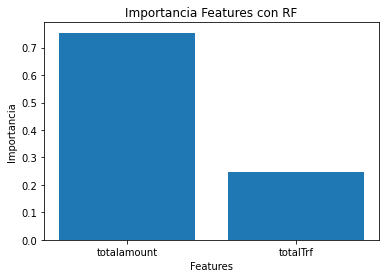

In [25]:
# Gini importance
rf_model.feature_importances_
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

In [26]:
#xgboost

In [27]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 10)

In [28]:
xg_reg.fit(X_train, y_train.astype(int))
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.458571


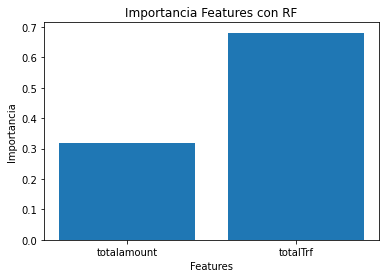

In [29]:
xg_reg.feature_importances_
plt.bar(X_train.columns, xg_reg.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

In [ ]:
#predecimos enserio con el dataframe test de kaggle

In [30]:
test.head(2)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A
0,6140,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_171,Product_Name_332,EUR,0.325,USD,0.36761,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,162240.0,EUR,367419.0,Prod_Category_A_None
1,6146,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_167,Product_Name_315,EUR,0.320,USD,0.36195,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,78624.0,EUR,367419.0,Prod_Category_A_None


In [ ]:
#xgboost
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

In [ ]:
# para recupera el df para subir

In [185]:
entrenamiento = pd.read_csv('data.csv')
 

In [98]:
#formamos el dataframe entrenamiento con feature engienri y su target

In [140]:
def agregarTargetDfOriginal(entrenamiento,df):
  target=entrenamiento[(entrenamiento['Stage']=='Closed Lost') | (entrenamiento['Stage']=='Closed Won')]
  target=target[['Opportunity_ID','Stage']].groupby(['Opportunity_ID','Stage']).agg(total=('Stage','count')).reset_index()[['Opportunity_ID','Stage']]
    
  entrenamiento=pd.merge(df,target,on="Opportunity_ID",how="inner") 
  df=entrenamiento.replace("Closed Lost", "0")
  df=df.replace("Closed Won", "1")
 
   
  return df

In [141]:
#feature engnerie
def featureEngeenier(df):
  #agregamos fecha 
  df['Month']=pd.to_datetime(df['Month'])
  df['anio']=df['Month'].dt.year
  df['mes']=df['Month'].dt.month
  #agregamos columna totalamount
  totalAmount=df.groupby(['Opportunity_ID' ]).agg(totalamount=('Total_Amount','sum'))
  #agregamos total trf
  totalTrf=df.groupby(['Opportunity_ID' ]).agg(totalTrf=('TRF','sum'))
  dfFeatureNew=pd.merge(totalAmount,totalTrf,on="Opportunity_ID",how="inner").reset_index()

  df=dfFeatureNew[['Opportunity_ID','totalamount','totalTrf']]
   
  

  return df
 

In [186]:
entrenamientoFeatureTarget=agregarTargetDfOriginal(entrenamiento,entrenamiento) 

In [212]:
dfentrenami=entrenamientoFeatureTarget[['Opportunity_ID','Territory','Stage_x']]
dfentrenami.columns=['Opportunity_ID','Territory','Stage']
dfentrenami.head(5)

,Opportunity_ID,Territory,Stage
0,0,None,0
1,1,None,1
2,2,NW America,1
3,3,NW America,0
4,4,NW America,0


In [213]:
dfentrenami['Stage']=dfentrenami['Stage'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [215]:
dfentrenami

,Opportunity_ID,Territory,Stage
0,0,None,0
1,1,None,1
2,2,NW America,1
3,3,NW America,0
4,4,NW America,0
...,...,...,...
16878,12801,Austria,1
16879,12801,Austria,1
16880,12801,Austria,1
16881,12802,NE America,0


In [234]:
dfentrenami

,Opportunity_ID,Territory,Stage
0,0,None,0
1,1,None,1
2,2,NW America,1
3,3,NW America,0
4,4,NW America,0
...,...,...,...
16878,12801,Austria,1
16879,12801,Austria,1
16880,12801,Austria,1
16881,12802,NE America,0


In [233]:
dfentrenami.drop_duplicates( )

,Opportunity_ID,Territory,Stage
0,0,None,0
1,1,None,1
2,2,NW America,1
3,3,NW America,0
4,4,NW America,0
...,...,...,...
16875,12799,Norway,1
16876,12800,NE America,0
16878,12801,Austria,1
16881,12802,NE America,0


In [ ]:
nwameria= cantitotaldeunos/cantitadtotaldefilas=1/3=0.333

In [229]:
dfentrenami.groupby(['Territory','Opportunity_ID' ]).agg(ta=('Stage','count')).reset_index()['Opportunity_ID']

0           0
1           1
2           2
3           3
4           4
        ...  
9786    12799
9787    12800
9788    12801
9789    12802
9790    12803
Name: Opportunity_ID, Length: 9791, dtype: int64

In [230]:
df_mean=dfentrenami.groupby(['Territory','Opportunity_ID']).agg(meanEncoding=('Stage','mean')).reset_index()

In [231]:
df_mean

,Territory,Opportunity_ID,meanEncoding
0,Albania,6766,0
1,Albania,6848,0
2,Armenia,3323,0
3,Australia,271,1
4,Australia,272,1
...,...,...,...
9786,Vietnam,8728,0
9787,Vietnam,8867,1
9788,Vietnam,8972,1
9789,Vietnam,9026,1


In [217]:
pd.merge(dfentrenami,df_mean, on='Territory', how='left')

,Opportunity_ID_x,Territory,Stage,Opportunity_ID_y,cantSumUno
0,0,None,0,0,0
1,0,None,0,1,1
2,0,None,0,8,0
3,0,None,0,9,0
4,0,None,0,10,0
...,...,...,...,...,...
15506636,12803,NE America,0,12724,0
15506637,12803,NE America,0,12725,0
15506638,12803,NE America,0,12800,0
15506639,12803,NE America,0,12802,0


In [142]:

entrenamientoFeature=featureEngeenier(entrenamiento)
entrenamientoFeatureTarget=agregarTargetDfOriginal(entrenamiento,entrenamientoFeature) 

In [143]:
entrenamientoFeatureTarget

,Opportunity_ID,totalamount,totalTrf,Stage
0,0,5272800.00,10,0
1,1,48230.00,0,1
2,2,83865.60,0,1
3,3,7421881.50,14,0
4,4,13357192.50,25,0
...,...,...,...,...
9786,12799,401700.00,1,1
9787,12800,21332500.00,40,0
9788,12801,299715.00,0,1
9789,12802,2346796.88,4,0


In [ ]:
#formamos feature enginerie al test

In [154]:
dfTest=featureEngeenier(test)
dfTest

,Opportunity_ID,totalamount,totalTrf
0,10689,367419.0,0
1,10690,757783.5,1
2,10691,21037.5,0
3,10692,2169106.5,6
4,10693,5752.5,0
...,...,...,...
1562,12364,147750.0,0
1563,12365,45054.9,0
1564,12366,100122.0,0
1565,12367,143220.0,0


In [ ]:
#¿Cuál es el formato de subida del archivo?
#Un csv con dos columnas (con header): el ID_Opportunity y el Target, siendo este último un número asociado
#a la probabilidad de Closed Won. Recordar que los ID_Opportunity del test son 1 567, porque hay líneas del
#set que contienen mismos ID pero montos diferentes (aunque asociados al mismo resultado de Won o Lose).

In [ ]:
# separa en train and test


In [145]:
X,y=entrenamientoFeatureTarget.iloc[:,1:-1], entrenamientoFeatureTarget.iloc[:,-1]

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
#probar modelos

In [147]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 10)

In [148]:
xg_reg.fit(X_train, y_train.astype(int))
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.455257


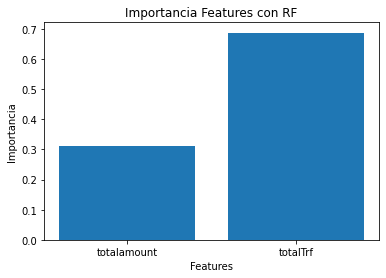

In [149]:
xg_reg.feature_importances_
plt.bar(X_train.columns, xg_reg.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

In [174]:
def formarDfKaggle(testWithFeature,preds ):
  dfkaggle = pd.DataFrame( preds)
  dfkaggle['Opportunity_ID']=testWithFeature['Opportunity_ID']
  dfkaggle.columns=['Target','Opportunity_ID']
  dfkaggle=dfkaggle[['Opportunity_ID','Target']]
  
  from google.colab import files
  dfkaggle.to_csv('dfKaggle.csv', index=False) 
  files.download('dfKaggle.csv')
 

In [150]:
dftestt=dfTest.iloc[:,1:3]
dftestt

,totalamount,totalTrf
0,367419.0,0
1,757783.5,1
2,21037.5,0
3,2169106.5,6
4,5752.5,0
...,...,...
1562,147750.0,0
1563,45054.9,0
1564,100122.0,0
1565,143220.0,0


In [151]:
#con el test de kaglle
preds = xg_reg.predict(dftestt)
preds 

array([0.534768  , 0.39591077, 0.6522572 , ..., 0.6522572 , 0.55602616,
       0.3828056 ], dtype=float32)

In [175]:
#formar dataframe kaggle
formarDfKaggle(dfTest,preds )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [169]:
 #YA NO LEER

In [ ]:
dfTest.groupby('target')['target'].value_counts()

target  target
0.0     0.0       2530
0.5     0.5         21
Name: target, dtype: int64

In [ ]:
from google.colab import  drive
drive.mount('/drive')

dfTest.to_csv('kaggletest.csv') 

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
!ls

adc.json  data.csv  kaggletest.csv  sample_data  test.csv


In [ ]:
dfTest = pd.DataFrame( diccionario)


 

NameError: ignored

In [ ]:
df.to_csv(index=False)

In [ ]:
entrenamiento[['stage2']].value_counts()

In [ ]:
test[['Total_Amount','TRF']]

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

In [ ]:
entrenamiento=entrenamiento.loc[(entrenamiento['Stage']=='Closed Lost' ) | (entrenamiento['Stage']=='Closed Won'),: ]

In [ ]:
#vemos que por cada oportunidad tenemos un solo termino de envio
entrenamiento.groupby(['Opportunity_Name','Delivery_Terms','Stage']).agg(cantidad=('Stage','count')).sample(2)

#cantidad de oportunidades por termino de envio

In [ ]:
opportunity_deliverTerms_stage=entrenamiento.groupby(['Opportunity_Name','Delivery_Terms','Stage']).agg(cantidad=('Stage','count'))\
.reset_index()[['Opportunity_Name','Delivery_Terms','Stage']]
opportunity_deliverTerms_stage.head(2)

In [ ]:
#voy a filtrar por los terminos que tengan mas de 40 casos de oportunidad dentro de cada termino
opportunity_deliverTerms_stage.groupby(['Delivery_Terms']).size()

In [ ]:
#ya filtrado
opportunity_deliverTerms_stage=opportunity_deliverTerms_stage.groupby(['Delivery_Terms']).filter(lambda x: x['Opportunity_Name'].count()>40)
opportunity_deliverTerms_stage.head(1)

In [ ]:
opportunity_deliverTerms=opportunity_deliverTerms_stage.groupby( 'Delivery_Terms').agg(cantidad_oportunidades=('Delivery_Terms','count')).reset_index()
opportunity_deliverTerms.head(10)

In [ ]:
opportunity_deliverTerms.replace({'Delivery_Terms_1': 'Delivery Terms 1' 	}, inplace=True)
opportunity_deliverTerms.replace({'Delivery_Terms_2': 'Delivery Terms 2' 	}, inplace=True)
opportunity_deliverTerms.replace({'Delivery_Terms_4': 'Delivery Terms 4' 	}, inplace=True)
opportunity_deliverTerms.replace({'Delivery_Terms_5': 'Delivery Terms 5' 	}, inplace=True)
opportunity_deliverTerms.replace({'Delivery_Terms_6': 'Delivery Terms 6' 	}, inplace=True)
opportunity_deliverTerms.replace({'Delivery_Terms_8': 'Delivery Terms 8' 	}, inplace=True)

#Hay alguna preferencia en cuanto a la cantidad de oportunidades de acuerdo al termino de envio?

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
g=sns.barplot(data=opportunity_deliverTerms.nlargest(10,'cantidad_oportunidades'), x="Delivery_Terms", y="cantidad_oportunidades",ax=ax)
g.set_title("Cantidad de Oportunidades por Termino de Envio", fontsize=22)
g.set_xlabel("Terminos de Envio",fontsize=15)
g.set_ylabel(" Cantidad de Oportunidades"	, fontsize=15)

#Conclusion: El termino de envio 4 , 2 y 1 son los que tienen mas oportunidades, esto debe ser alguna facilidad o ventaja en el envio que provee estos con respecto a los otros.

#tasa de closed won por termino de envio y Cantidad de stage por tipo de termino de delivery



In [ ]:
opportunity_deliverTerms_stage=entrenamiento.groupby(['Opportunity_Name','Delivery_Terms','Stage']).agg(cantidad=('Stage','count'))\
.reset_index()[['Opportunity_Name','Delivery_Terms','Stage']]
 


In [ ]:
entrenamiento.groupby(['Opportunity_Name','Delivery_Terms','Stage']).agg(cantidad=('Stage','count'))\
.reset_index()[['Opportunity_Name','Delivery_Terms','Stage']]

In [ ]:
opportunity_deliverTerms_stage=opportunity_deliverTerms_stage.groupby(['Delivery_Terms']).filter(lambda x: x['Opportunity_Name'].count()>40)


In [ ]:
opportunity_deliverTerms_stage.groupby(['Delivery_Terms'])['Delivery_Terms'].transform('size')

In [ ]:
opportunity_deliverTerms_stage.groupby(['Delivery_Terms','Stage'])['Stage'].size()

In [ ]:
cant_opportunity_deliverTerms=opportunity_deliverTerms_stage.groupby(['Delivery_Terms','Stage'])\
.agg(cantidad=('Stage','count')).unstack()
cant_opportunity_deliverTerms.columns=cant_opportunity_deliverTerms.columns.droplevel()

In [ ]:
#conseguimos tasa por delivery terms
cant_opportunity_deliverTerms['tasa_won']=cant_opportunity_deliverTerms['Closed Won'] /(cant_opportunity_deliverTerms['Closed Lost']\
                                                                                        +cant_opportunity_deliverTerms[ 'Closed Won' ] )
cant_opportunity_deliverTerms=cant_opportunity_deliverTerms.reset_index()

In [ ]:
cant_opportunity_deliverTerms.replace({'Delivery_Terms_1': 'Delivery Terms 1' 	}, inplace=True)
cant_opportunity_deliverTerms.replace({'Delivery_Terms_2': 'Delivery Terms 2' 	}, inplace=True)
cant_opportunity_deliverTerms.replace({'Delivery_Terms_4': 'Delivery Terms 4' 	}, inplace=True)
cant_opportunity_deliverTerms.replace({'Delivery_Terms_5': 'Delivery Terms 5' 	}, inplace=True)
cant_opportunity_deliverTerms.replace({'Delivery_Terms_6': 'Delivery Terms 6' 	}, inplace=True)
cant_opportunity_deliverTerms.replace({'Delivery_Terms_8': 'Delivery Terms 8' 	}, inplace=True)

In [ ]:
cant_opportunity_deliverTerms

In [ ]:
df=cant_opportunity_deliverTerms
df2=cant_opportunity_deliverTerms[['Delivery_Terms','Closed Lost','Closed Won']].set_index('Delivery_Terms')

fig, ax = plt.subplots(figsize=(15,12))


#fig = plt.figure()
#fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)
#ax1=plt.subplot(2, 3, 4)

 
#g = sns.barplot(x=df['Opportunity_Name'], y=df['total_trf_with_opportunity'],hue="Stage",data=df,ax=ax)
g = sns.heatmap(  data=df2,vmin=0, cmap="YlGnBu",ax=ax)
g.set_title("Cantidad de Estados  por Tipo de Termino de Envio ", fontsize=20)
g.set_ylabel("Termino de envio", fontsize=18)
g.set_xlabel("Tipo de Estado ", fontsize=18)

#ax1=plt.xticks(())
#ax1=plt.yticks(()) 


#ax2=plt.subplot(2, 3, 5)
#g = sns.barplot(x='Delivery_Terms', y='tasa_won',palette=["lightblue", "lightpink"] ,data=df,ax=ax2)
#g.set_title("Tasa de Closed Won por Termino de Envio", fontsize=20)
#g.set_xlabel("Termino de Envio", fontsize=15)
#g.set_ylabel("Tasa de Closed Won", fontsize=15)
#ax1=plt.xticks(())
#ax1=plt.yticks(())

 

plt.show()

In [ ]:
df=cant_opportunity_deliverTerms
df2=cant_opportunity_deliverTerms[['Delivery_Terms','Closed Lost','Closed Won']].set_index('Delivery_Terms')

fig, ax = plt.subplots(figsize=(15,12))


#fig = plt.figure()
#fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)


#ax2=plt.subplot(2, 3, 5)
g = sns.barplot(x='Delivery_Terms', y='tasa_won',palette=["lightblue", "lightpink"] ,data=df,ax=ax)
g.set_title("Tasa de Closed Won por Termino de Envio", fontsize=20)
g.set_xlabel("Termino de Envio", fontsize=15)
g.set_ylabel("Tasa de Closed Won", fontsize=15)
#ax1=plt.xticks(())
#ax1=plt.yticks(())

 

plt.show()

#Conclusion: La mayor cantidad de closed Won se situan en los Terminos de Envio 2,4,1 , pero la mayor tasa de conversion se situa en los Terminos de Envio 6,5 , entonces es mas probable qure convierta con closed won si el termino de envio es 6, y quizas habria que incentivar a usar al cliente este termino de envio, ya que al final vamos al vender mas.

##tasa de won por delivery term  por territory

In [ ]:
opportunity_territory_deliverTerms_stage=entrenamiento.groupby(['Territory','Opportunity_Name','Delivery_Terms','Stage']).agg(cantidad=('Stage','count'))\
.reset_index()[['Territory','Opportunity_Name','Delivery_Terms','Stage']]
 


In [ ]:
entrenamiento.groupby(['Territory','Opportunity_Name','Delivery_Terms','Stage']).agg(cantidad=('Stage','count'))\
.reset_index()

In [ ]:
opportunity_territory_deliverTerms_stage

In [ ]:
#opportunity_deliverTerms_stage['cantidad_casos']=opportunity_deliverTerms_stage.groupby(['Territory' ])['Territory'].transform('size')
#opportunity_deliverTerms_stage['cantidad_casos'].value_counts()
#mayor a 80 casos por territorio para tomar la muestra confiable

In [ ]:
opportunity_territory_deliverTerms_stage=opportunity_territory_deliverTerms_stage.groupby(['Territory']).filter(lambda x: x['Territory'].count()>80)


In [ ]:
opportunity_territory_deliverTerms_stage.groupby(['Delivery_Terms'])['Delivery_Terms'].transform('size')

In [ ]:
opportunity_territory_deliverTerms_stage.groupby(['Territory','Delivery_Terms','Stage'])['Stage'].size()

In [ ]:
cant_opportunity_territory__deliverTerms=opportunity_territory_deliverTerms_stage.groupby(['Territory','Delivery_Terms','Stage'])\
.agg(cantidad=('Stage','count')).unstack()
cant_opportunity_territory__deliverTerms.columns=cant_opportunity_territory__deliverTerms.columns.droplevel()

In [ ]:
#conseguimos tasa por delivery terms
cant_opportunity_territory__deliverTerms['tasa_won']=cant_opportunity_territory__deliverTerms['Closed Won'] /(cant_opportunity_territory__deliverTerms['Closed Lost']\
                                                                                        +cant_opportunity_territory__deliverTerms[ 'Closed Won' ] )
cant_opportunity_territory__deliverTerms=cant_opportunity_territory__deliverTerms.reset_index()

In [ ]:
cant_opportunity_territory__deliverTerms.groupby('Territory').size()

In [ ]:
#aca agarramos los  que tienen mas casos para mostrar
top_7_territory_ca=cant_opportunity_territory__deliverTerms.fillna(0).groupby('Territory').agg(cantidad=('Territory','count')).nlargest(7,'cantidad').reset_index()

In [ ]:
top_7_territory_ca

In [ ]:
list_top7_territory=top_7_territory_ca['Territory'].to_list()

In [ ]:
cant_opportunity_territory__deliverTerms=cant_opportunity_territory__deliverTerms.loc[cant_opportunity_territory__deliverTerms['Territory'].isin(list_top7_territory),:]

In [ ]:
cant_opportunity_territory__deliverTerms=cant_opportunity_territory__deliverTerms.fillna(0)

In [ ]:
df=cant_opportunity_territory__deliverTerms 

In [ ]:
df

In [ ]:
df=df.loc[  df['Territory']!="None",: ]

Cual son los territorios con mayor tasa de Closed Won de Termino de Envio? 

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))

g= sns.boxplot(y='tasa_won', x='Territory', 
                 data=df, 
                 width=0.5,
                 palette="colorblind", ax=ax)


g.set_title("Top 6 Tasa de Closed Won por Termino de Envio  por Territorio ", fontsize=20)
g.set_xlabel("Territorio", fontsize=18)
g.set_ylabel("Tasa de Closed Won por Termino de Envio", fontsize=18)
plt.show()

Vemos que el Territorio con mayor tasa de won promedio por termino de envio e Germany  pero  sus tasas de closed won  es muy dispersa. NW America  no tendra la tasa promedio de closed won mas alta pero  no es tan dispersa.Por lo tanto un oportunidad que se envia por tipo termino de envio en alguno de estos territorios tendra mayor tasa de closed won.

## Afecta  el mes  para la tasa de negociacion de la venta  ?





In [ ]:
entrenamiento.groupby(['mes','Stage']).agg(cant=('ID','count'))

In [ ]:
#vemos que cada mes puede tener muchas oportunidades- por lo tanto su stagte segun la oportunidad
entrenamiento[['mes','Opportunity_Owner','TRF','Stage','Opportunity_Name','Account_Type']]\
.groupby(['mes','Opportunity_Name','Stage'])\
.agg(cantidad=('Stage','count')).head(10)

In [ ]:

mes_opportunity_stage=entrenamiento[['mes','Opportunity_Owner','TRF','Stage','Opportunity_Name','Account_Type']]\
.groupby(['mes','Opportunity_Name','Stage'])\
.agg(cantidad=('Stage','count'))

In [ ]:
mes_opportunity_stage=mes_opportunity_stage.reset_index()[['mes','Opportunity_Name','Stage']]

In [ ]:
mes_cant_stage=mes_opportunity_stage.groupby(['mes','Stage']).agg(cantidad=('Stage','count')).unstack()
mes_cant_stage.columns=['Closed Lost','Closed Won']

In [ ]:
tasa_mes_cant_stage= mes_cant_stage['Closed Won'] / (mes_cant_stage['Closed Lost'] + mes_cant_stage['Closed Won'])

In [ ]:
tasa_mes_cant_stage=tasa_mes_cant_stage.to_frame()

In [ ]:
tasa_mes_cant_stage.columns=['tasa_won']

In [ ]:
tasa_mes_cant_stage=tasa_mes_cant_stage.reset_index()

In [ ]:
Como es la Tasa de Closed Won por Mes?

#Como es la Tasa de Closed Won por Mes?

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
g=sns.lineplot(data=tasa_mes_cant_stage, x="mes", y="tasa_won",ax=ax)
g.set_title("Tasa de Closed Won por Mes", fontsize=22)
g.set_xlabel("Mes",fontsize=15)
g.set_ylabel(" Tasa de Closed Won ", fontsize=15)

Se observa que la tasa de Closed Won en especial vemos desde el mes 10 a 12 aumenta hasta llegar a un pico de 0.62 en el mes diciembre, si queremos mas closed won , este mes es el indicado

## Afecta  el mes  para la negociacion(Stage) de la venta de la oportunidad?





In [ ]:
mes_opportunity_stage=entrenamiento[['mes','Opportunity_Owner','TRF','Stage','Opportunity_Name','Account_Type']]\
.groupby(['mes','Opportunity_Name','Stage'])\
.agg(cantidad=('Stage','count'))\


In [ ]:
mes_opportunity_stage=mes_opportunity_stage.reset_index()[['mes','Opportunity_Name','Stage']].groupby(['mes','Stage']).agg(cantidad=('Stage','count')).reset_index()

In [ ]:
mes_opportunity_stage.head(2)

## Afecta  el mes  para la negociacion(Stage) de la venta de la oportunidad?


In [ ]:
fig, ax = plt.subplots(figsize=(17,11))
df= mes_opportunity_stage
g = sns.barplot(x=df['mes'], y=df['cantidad'] ,hue='Stage',data=df,ax=ax)
g.set_title("Cantidad de Oportunidades por Etapa por Mes ", fontsize=20)
g.set_xlabel("Mes", fontsize=18)
g.set_ylabel("Cantidad de Oportunidades por Etapa", fontsize=18)
plt.show

Vemos en particular que en el mes 12 la cantidad de closed won sobre lost es mayor al 30 por ciento, esto es porque la tasa de conversion de closed won es mayor en diciembre, es el mes donde se mas se realiza closed won, se tendria que conseguir mas oportunidades para ese mes en especial. 

#Cantidad de oportunidades por stage por anio  y Tasa de closed_won por Anio

In [ ]:
entrenamiento = pd.read_csv('data.csv')
entrenamiento['Month']=pd.to_datetime(entrenamiento['Month'])
entrenamiento['anio']=entrenamiento['Month'].dt.year
entrenamiento['mes']=entrenamiento['Month'].dt.month

In [ ]:
anio_opportunity_stage=entrenamiento.groupby(['anio','Opportunity_Name','Stage']).agg(cantidad=('Stage','count'))\
.reset_index()[['anio','Opportunity_Name','Stage']]
 


In [ ]:
opportunity_deliverTerms_stage

In [ ]:
anio_opportunity_stage.groupby(['anio']).size()
#se saca 2019 por pocos datos

In [ ]:
anio_opportunity_stage=anio_opportunity_stage.groupby(['anio']).filter(lambda x: x['Opportunity_Name'].count()>240)


In [ ]:
 anio_opportunity_stage.head(2)

In [ ]:
cant_anio_opportunity_stage=anio_opportunity_stage.groupby(['anio','Stage'])\
.agg(cantidad=('Stage','count')).unstack()
cant_anio_opportunity_stage.columns=cant_anio_opportunity_stage.columns.droplevel()

In [ ]:
#conseguimos tasa por delivery terms
cant_anio_opportunity_stage['tasa_won']=cant_anio_opportunity_stage['Closed Won'] /(cant_anio_opportunity_stage['Closed Lost']\
                                                                                        +cant_anio_opportunity_stage[ 'Closed Won' ] )
cant_anio_opportunity_stage=cant_anio_opportunity_stage.reset_index()

In [ ]:
cant_anio_opportunity_stage

In [ ]:
#sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

In [ ]:
df2=cant_anio_opportunity_stage[['anio','Closed Lost', 	'Closed Won']].set_index('anio')

Como es la cantidad de oportunidades por Stage por Año?

In [ ]:

fig, ax = plt.subplots(figsize=(20,11))


#fig = plt.figure()
#fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)

#ax1=plt.subplot(2, 3, 4)

 
#g = sns.barplot(x=df['Opportunity_Name'], y=df['total_trf_with_opportunity'],hue="Stage",data=df,ax=ax)
g = sns.heatmap(  data=df2,vmin=0,ax=ax)
g.set_title("Cantidad de oportunidades por Etapa por Año ", fontsize=20)
g.set_xlabel("Etapa", fontsize=18)
g.set_ylabel(" Año", fontsize=18)

**Vemos que la cantidad de oportunidades tuvo su pico mas alto de closed won en  2017 pero a partir de ese Año baja la cantidad de oportunidades de items, esto podria ser un mal manejo de la empresa .**

In [ ]:
cant_anio_opportunity_stage['anio'].astype(int)

#Como es la Tasa de Closed Won por Año?

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
g=sns.barplot(data=cant_anio_opportunity_stage, x=cant_anio_opportunity_stage['anio'].astype(int), y="tasa_won",ax=ax)
g.set_title("Tasa de Closed Won por  Año", fontsize=22)
g.set_xlabel("Año",fontsize=15)
g.set_ylabel("Tasa de Closed Won ", fontsize=15)

#Vemos que la tasa de closed won baja a casi la mitad en 2019 con respecto a 2018, posiblemente algo grave estaba pasando la empresa en ese anio.

#tasa de stage won segun tipo de cuenta

---



In [ ]:
#vemos que cada oportunidad tiene una cuenta type, entonces saco repetidos
entrenamiento[['Opportunity_Owner','TRF','Stage','Opportunity_Name','Account_Type']]\
.groupby(['Opportunity_Name','Account_Type','Stage','Opportunity_Owner'])\
.agg(cantidad=('Stage','count')).sample(2)

In [ ]:
stage_opportunity_typeaccount=entrenamiento[['Opportunity_Owner','TRF','Stage','Opportunity_Name','Account_Type']]\
.groupby(['Opportunity_Name','Account_Type','Stage','Opportunity_Owner'])\
.agg(cantidad=('Stage','count')).reset_index()[[ 'Stage','Opportunity_Name','Account_Type']]

In [ ]:
#tasa de closed won / closed lost + closed won
count_stage_opportunity_typeaccount=stage_opportunity_typeaccount\
.groupby(['Account_Type','Stage']).agg(cantidad=('Stage','count')).unstack()

In [ ]:
count_stage_opportunity_typeaccount.columns=count_stage_opportunity_typeaccount.columns.droplevel()


In [ ]:
tasa_acountType_stage=count_stage_opportunity_typeaccount['Closed Won']/( count_stage_opportunity_typeaccount['Closed Lost'] + count_stage_opportunity_typeaccount['Closed Won'] )

In [ ]:
tasa_acountType_stage=tasa_acountType_stage.to_frame().reset_index()
 

In [ ]:
tasa_acountType_stage.columns=['Account_Type', 'tasa_won_over_lost']

In [ ]:
top_tasa_acountType_stage=tasa_acountType_stage.nlargest(10,'tasa_won_over_lost')

In [ ]:
top_tasa_acountType_stage

In [ ]:
top_tasa_acountType_stage.replace({'Account_Type_0': 'Account Type 0' 	}, inplace=True)
top_tasa_acountType_stage.replace({'Account_Type_2': 'Account Type 2' 	}, inplace=True)
top_tasa_acountType_stage.replace({'Account_Type_4': 'Account Type 4' 	}, inplace=True)
top_tasa_acountType_stage.replace({'Account_Type_5 	': 'Account Type 5' 	}, inplace=True)
top_tasa_acountType_stage.replace({'Account_Type_1': 'Account Type 1' 	}, inplace=True)
top_tasa_acountType_stage.replace({'Account_Type_6': 'Account Type 6' 	}, inplace=True)

In [ ]:
top_tasa_acountType_stage=top_tasa_acountType_stage.loc[top_tasa_acountType_stage['Account_Type']!='None',:]

In [ ]:
top_tasa_acountType_stage

#Como es la Tasa de Closed Won segun Tipo de Cuenta?


In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
g=sns.barplot("tasa_won_over_lost", "Account_Type", data=top_tasa_acountType_stage,palette=["lightpink"],ax=ax);
g.set_title("Tasa de Closed Won segun Tipo de Cuenta", fontsize=20)
g.set_xlabel("Tasa de Closed Won ", fontsize=18)
g.set_ylabel("Tipo de  Cuentas", fontsize=18)

#Vemos que el tipo de Cuenta 0 es la que tiene una tasa de closed won mas alta.

##Hay preferencias por la eleccion de algun tipo de cuenta con su relacion de cantidad de oportunidades?

In [ ]:
#vemos que cada oportunidad tiene una cuenta type, entonces saco repetidos
entrenamiento[['TRF','Stage','Opportunity_Name','Account_Type']].groupby(['Opportunity_Name','Account_Type'])\
.agg(cantidad=('Stage','count')).head(2)


In [ ]:
opportinty_name_account_type=entrenamiento[['TRF','Stage','Opportunity_Name','Account_Type']].groupby(['Opportunity_Name','Account_Type'])\
.agg(cantidad=('Stage','count'))
opportinty_name_account_type= opportinty_name_account_type.reset_index().drop('cantidad', 1)


In [ ]:
#ahora vamos a ver la cantidad de oportunidades que hay por typo de cuenta
top10_opportinty_name_account_type=opportinty_name_account_type.groupby('Account_Type')\
.agg(cantidad_oportunidades=('Opportunity_Name','count')).nlargest(10,'cantidad_oportunidades')
top10_opportinty_name_account_type=top10_opportinty_name_account_type.reset_index()

In [ ]:
top10_opportinty_name_account_type.replace({'Account_Type_0': 'Account Type 0' 	}, inplace=True)
top10_opportinty_name_account_type.replace({'Account_Type_2': 'Account Type 2' 	}, inplace=True)
top10_opportinty_name_account_type.replace({'Account_Type_4': 'Account Type 4' 	}, inplace=True)
top10_opportinty_name_account_type.replace({'Account_Type_5 	': 'Account Type 5' 	}, inplace=True)
top10_opportinty_name_account_type.replace({'Account_Type_1': 'Account Type 1' 	}, inplace=True)
top10_opportinty_name_account_type.replace({'Account_Type_6': 'Account Type 6' 	}, inplace=True)

In [ ]:
top10_opportinty_name_account_type=top10_opportinty_name_account_type.loc[top10_opportinty_name_account_type['Account_Type']!='None',:]

#Cual es la tipo de cuenta elegida para generar oportunidades?

In [ ]:
df=top10_opportinty_name_account_type
 
#top10_opportinty_name_account_type
fig, ax = plt.subplots(figsize=(12,11))
 
g = sns.barplot(x=df['Account_Type'], y=df['cantidad_oportunidades'],data=df,ax=ax)
g.set_title("Cantidad de Oportunidades por Tipo de Cuenta ", fontsize=20)
g.set_xlabel("Tipo de cuenta", fontsize=18)
g.set_ylabel("Cantidad de Oportunidades", fontsize=18)

**Vemos que los tipos de cuenta mas usadas son del tipo 0,2, y 5 esto debe ser posiblemente por por los terminos y condiciones que proveen estos tipos de cuenta**

In [ ]:
entrenamiento[['Territory','TRF','Stage','Opportunity_Name']].groupby(['Territory','Opportunity_Name','Stage','TRF']).agg(cantidad_trf=('TRF','sum'))

In [ ]:
data_set=entrenamiento[['Territory','TRF','Stage','Opportunity_Name']].groupby(['Territory','Opportunity_Name','Stage','TRF'])\
.agg(cantidad_trf=('TRF','sum')).reset_index()[['Territory','Opportunity_Name','Stage','TRF']]
data_set=data_set.loc[data_set['Territory']!='None',:]

In [ ]:
territory_top10_casos=data_set.groupby(['Territory']).agg(cantidad_casos=('Territory','count')).nlargest(10,'cantidad_casos').reset_index()
territory_top10_casos

In [ ]:
###

In [ ]:
data_set

In [ ]:
###

In [ ]:
###

In [ ]:
lista_territory=territory_top10_casos['Territory'].to_list()

In [ ]:
tasa_data_set=data_set.groupby(['Territory','Stage'])\
.agg(cantidad=('Stage','count')).unstack()
tasa_data_set.columns=tasa_data_set.columns.droplevel()
tasa_data_set= tasa_data_set.reset_index()
tasa_data_set['tasa']= tasa_data_set['Closed Won'] / (tasa_data_set['Closed Lost'] + tasa_data_set['Closed Won'])
tasa_data_set=tasa_data_set.fillna(0)
tasa_data_set

In [ ]:
total_trf=data_set.groupby(['Territory'])\
.agg(total_trf=('TRF','sum')).reset_index()
total_trf

In [ ]:
data_set

In [ ]:
trf_tasa=pd.merge(total_trf,tasa_data_set,on='Territory',how='inner')
trf_tasa.head(2)

In [ ]:
trf_tasa['total_won_trf']=trf_tasa['tasa']*trf_tasa['total_trf']
trf_tasa['total_lost_trf']=(1-trf_tasa['tasa'])*trf_tasa['total_trf']

#Hay correlacion entre la cantidad de TRF WON Y LOST por Territorio?

In [ ]:
fig, ax = plt.subplots(figsize=(35,11))

ax1=plt.subplot(2, 3,2)


g=sns.scatterplot(data=trf_tasa, x="total_won_trf", y="total_lost_trf",ax=ax1)
g.set_title(" Cantidad de TRF Won y Lost por Territorio", fontsize=22)
g.set_xlabel("Cantidad de TRF Won",fontsize=15)
g.set_ylabel("Cantidad de TRF Lost", fontsize=15)

ax2=plt.subplot(2, 3, 3)
ax2.set(ylim=(0, 500))
ax2.set(xlim=(0,500))

g=sns.scatterplot(data=trf_tasa, x="total_won_trf", y="total_lost_trf",ax=ax2)
g.set_title("(ZOOM)Cantidad de TRF Won y Lost por Territorio", fontsize=22)
g.set_xlabel("Cantidad de TRF Won",fontsize=15)
g.set_ylabel("Cantidad de TRF Lost", fontsize=15)


plt.show()

#Vemos que una muy pequenia correlacion positiva ( 0.5 a 0.8  aproximadamente) entre cantidad de TRF WON y  TRF LOST por territorio, esta bueno esto, porque  tenemos como es la tendencia aproximada entre estas dos variables, y su similar comportamiento independientemente del territorio en especial entre canidades de rango y,x de 0 a 500.

In [ ]:
##

In [ ]:
##

In [ ]:
total_trf=data_set.loc[data_set['Territory'].isin(lista_territory),:].groupby(['Territory'])\
.agg(total_trf=('TRF','sum')).reset_index()
total_trf

In [ ]:
trf_tasa=pd.merge(total_trf,tasa_data_set,on='Territory',how='inner')
trf_tasa.head(2)

In [ ]:
trf_tasa['total_won_trf']=trf_tasa['tasa']*trf_tasa['total_trf']
trf_tasa['total_lost_trf']=(1-trf_tasa['tasa'])*trf_tasa['total_trf']

In [ ]:
trf_tasa.rename(columns={'total_lost_trf': 'Total Lost Trf', 'total_won_trf': 'Total Won TRF', 'total_trf': 'Total TRF'}, inplace=True)

In [ ]:
trf_tasa

#Cuales son los Territorios con mas cantidad  de TRF ofrecida y que cantidad es vendida y cual no?  

In [ ]:
fig, ax = plt.subplots(figsize=(15,11))


#fig = plt.figure()
#fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)
#ax1=plt.subplot(2, 3, 4)

 
#g = sns.barplot(x=df['Opportunity_Name'], y=df['total_trf_with_opportunity'],hue="Stage",data=df,ax=ax)
g = sns.heatmap(  data=trf_tasa.set_index('Territory')[['total trf','total won trf','total lost trf']] ,cmap="YlGnBu",ax=ax)
g.set_title("Cantidades Total, Won, Lost de TRF por Territorio", fontsize=20)
g.set_xlabel("TRF", fontsize=18)
g.set_ylabel("Top 10 Territorio con mas TRF  ", fontsize=18)

Vemos que la mayoria de territorios son de Europa, se debe usar mucho esos 

*   Elemento de lista
*   Elemento de lista

productos

In [ ]:
trf_tasa.set_index('Territory')

Relacion entre tasa, cantidad de Closed WON y cantidad total de TRF por Territorio?

In [ ]:
 

df=trf_tasa.set_index('Territory')

axes=sns.relplot(x="tasa", y="total trf", hue="Territory", size="Closed Won",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=7, data=df, ax=ax)

#axes.fig.suptitle("My Title", x=0.4, y=0.98)

plt.subplots_adjust(top=0.9)
axes.fig.suptitle('Tasa,cantidad closed Won y Cantidad Total de TRF Por Territorio', fontsize=20)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
axes.set(xlabel='Tasa de Closed Won', ylabel='Total de TRF')


#Vemos que en Australia y NW America tiene una tasa alta de closed won y el total de TRF ofrecido son los dos mas altos. 

#SE TERMINO ACA------------------------------------------------------------------

#Cantidad de Trf won por mes

In [ ]:
#por cada oportuniti name, tengo un solo tipo de stage
entrenamiento[['TRF','Stage','Opportunity_Name']].groupby(['Opportunity_Name','Stage']).agg(cantidad=('Stage','count'))

In [ ]:
#aca vemos que por cada oportunidad tenemos muchas trf distintos, ojo no hablamos de la cantida
#sino de que en un oportunity name tenemos ejemplo en opoortunity_name_1 y dentro de el trf con un valor 0 y otro
# en 1, la columna cantidad es irrelevante,solo se mira los repetidos que tiene.
entrenamiento[['TRF','mes','Stage','Opportunity_Name']].groupby(['mes','Opportunity_Name','TRF'])\
.agg(cantidad=('Stage','count')).head(3)

In [ ]:
#truco si lo agrupamos hasta el valor trf, entonces ya no tenemos repetidos
df_opportunity_trf=entrenamiento[['mes','TRF','Stage','Opportunity_Name']]\
.groupby(['mes','Opportunity_Name','Stage','TRF']).agg(cantidad=('Stage','count'))\
.reset_index()[['mes','Opportunity_Name','Stage','TRF']]

In [ ]:
#ahoro si puedo sumar los trf
df_opportunity_trf.head(3)

In [ ]:
oppornity_total_trf=df_opportunity_trf.groupby('mes')\
.agg(total_trf_with_opportunity=('TRF','sum')).reset_index()
oppornity_total_trf.head(3)

In [ ]:
#agrupo por oportuniy y stage, ya qu con este truco, me va a dar todo distinto, sin repetir.
opportunity_stage=entrenamiento[['mes','Opportunity_Name','Stage']]\
.groupby( ['mes','Opportunity_Name','Stage' ]).agg(canti=('Stage','count')).reset_index()[['mes','Stage']]
opportunity_stage=opportunity_stage.loc[\
                                        (opportunity_stage['Stage']=='Closed Lost') |  (opportunity_stage['Stage']=='Closed Won'),:]
opportunity_stage.head(2)                                        

In [ ]:
df=opportunity_stage.groupby(['mes','Stage']).agg(cantidad=('Stage','count')).unstack()
df.columns=df.columns.droplevel()

In [ ]:
opportunity_stage=df

In [ ]:
mes_trf_stage=pd.merge(opportunity_stage, oppornity_total_trf, on='mes', how='inner')
mes_trf_stage.head(2)

In [ ]:
mes_trf_stage['tasa']=mes_trf_stage['Closed Won'] / (mes_trf_stage['Closed Won'] + mes_trf_stage['Closed Lost'])


In [ ]:
mes_trf_stage['cantidad_trf_won']=mes_trf_stage['tasa']*mes_trf_stage['total_trf_with_opportunity']

In [ ]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

In [ ]:
fig, ax = plt.subplots(figsize=(28,11))


#fig = plt.figure()
#fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)
ax1=plt.subplot(2, 3, 4)

 
#g = sns.barplot(x=df['Opportunity_Name'], y=df['total_trf_with_opportunity'],hue="Stage",data=df,ax=ax)
g = sns.barplot(x='mes', y='cantidad_trf_won',palette=["red"],data=mes_trf_stage,ax=ax1)
g.set_title("Cantidad de Trf won por mes", fontsize=20)
g.set_xlabel("mes", fontsize=18)
g.set_ylabel("Cantidad de TRF", fontsize=18)


 

plt.show()f
##### ver###

In [ ]:
# de aca para abajo no leer.

In [ ]:
import pylab as pl
import numpy as np

# Crear una figura de 8x6 puntos de tamaño, 80 puntos por pulgada
pl.figure(figsize=(8, 6), dpi=80)

# Crear una nueva subgráfica en una rejilla de 1x1
pl.subplot(1, 1, 1)

#aca creamos la linEA, eje x
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
#aca modelamos que forma tendra la linea por eso se les pasa el x.
C, S = np.cos(X), np.sin(X)
  #es el ejex y c el eje y
# Graficar la función coseno con una línea continua azul de 1 pixel de grosor
pl.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Graficar la función coseno con una línea continua verde de 1 pixel de grosor
pl.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Establecer límites del eje x
pl.xlim(-4.0, 4.0)

# Ticks en x
pl.xticks(np.linspace(-4, 4, 9, endpoint=True))

# Establecer límites del eje y
pl.ylim(-1.0, 1.0)

# Ticks en y
pl.yticks(np.linspace(-1, 1, 5, endpoint=True))

# Guardar la figura usando 72 puntos por pulgada
# savefig("exercice_2.png", dpi=72)

# Mostrar resultado en pantalla
pl.show()

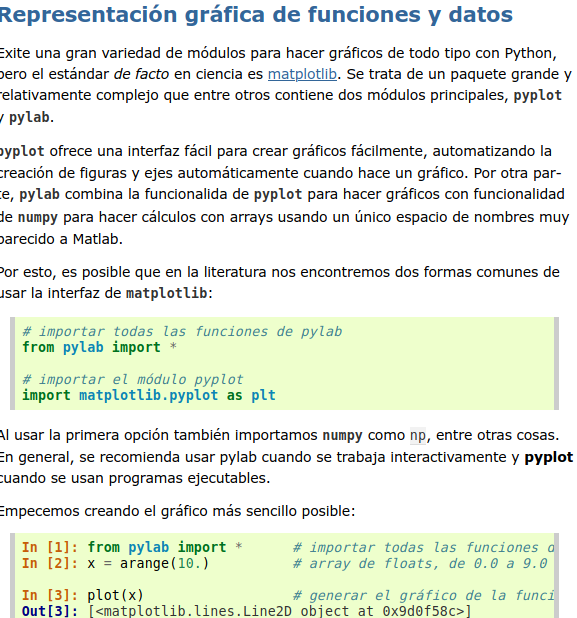

In [ ]:
#¿Por qué Total_Taxable_Amount es a veces mayor que Total_Amount?
no es mayor

In [ ]:
amount=entrenamiento
amount['total_amount_taxable_aux']=entrenamiento.groupby('Opportunity_Name')['Total_Amount'].transform('sum')
a=amount[(amount['total_amount_taxable_aux']-amount['Total_Taxable_Amount'])>0]#.head(10)#[['total_amount_taxable_aux','Total_Taxable_Amount']]
#.agg(cant_total_amount=('Total_Amount','sum')).reset_index()
#amount['delta_amount_with_amoun_taxable']=amount['cant_total_amount'] - amount['total_taxable']
#amount[amount['delta_amount_with_amoun_taxable'] >0]
a

In [ ]:
df=opportunity_trf_stage.nlargest(50,'closed_won')

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
 
g = sns.barplot(x=df['Opportunity_Name'], y=df['total_trf_with_opportunity'],hue="Stage",data=df,ax=ax)
g.set_title("Cantidad de Cuentas por Tipo de Cuenta por  Stage", fontsize=20)
g.set_xlabel("Tipo de Stage", fontsize=18)
g.set_ylabel("Cantidad de Cuentas", fontsize=18)

In [ ]:
df_owners_mean_wins = entrenamiento.groupby("Opportunity_Owner")\
.filter(lambda x: (x["Stage"].count() > 50 ))



In [ ]:
df_owners_mean_wins

In [ ]:
df_owners_mean_wins["Stage"] = df_owners_mean_wins["Stage"].apply(lambda x: 1 if (x == "Closed Won") else 0)

df_owners_mean_wins

In [ ]:
entrenamiento.groupby["Opportunity_Owner"]

In [ ]:
#acount y trf
accountName_sum_trf=entrenamiento.groupby(['Account_Name','TRF']).agg(sum_trf=('TRF','sum')).reset_index().nlargest(10,'sum_trf')
accountName_sum_trf

In [ ]:
#acount y trf
account_sum_trf=entrenamiento.groupby(['Account_Name']).agg(sum_trf=('TRF','sum')).reset_index()


In [ ]:
account_cant_won=entrenamiento.loc[entrenamiento['Stage']=='Closed Won'].groupby(['Account_Name']).agg(cant_stage_won=('ID','count'))

In [ ]:
relacion_account_sum_trf_with_cant_won=pd.merge(account_sum_trf, account_cant_won,on='Account_Name', how='inner')

In [ ]:
relacion_account_sum_trf_with_cant_won

In [ ]:
#acount y trf
account_sum_trf=entrenamiento.groupby(['Account_Name']).agg(sum_trf=('TRF','sum')).reset_index()
account_cant_losed=entrenamiento.loc[entrenamiento['Stage']=='Closed Lost'].groupby(['Account_Name']).agg(cant_stage_losed=('ID','count'))
relacion_account_sum_trf_with_cant_losed=pd.merge(account_sum_trf, account_cant_losed,on='Account_Name', how='inner')
relacion_account_sum_trf_with_cant_losed

In [ ]:
sns.scatterplot(data=relacion_account_sum_trf_with_cant_losed, x="sum_trf", y="cant_stage_losed")

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot(data=relacion_account_sum_trf_with_cant_won, x="sum_trf", y="cant_stage_won", ax=ax)
ax2 = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
sns.boxplot(data=relacion_account_sum_trf_with_cant_won,x="sum_trf", y="cant_stage_won",ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([0,50])
ax2.set_ylim([0,50])

In [ ]:
relacion_account_sum_trf_with_cant_won['tipo']='stage_won'

In [ ]:
fig, ax = plt.subplots()

ax = sns.boxplot(x="tipo", y="cant_stage_won" , data=relacion_account_sum_trf_with_cant_won,ax=ax)
ax2 = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
sns.boxplot( ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([0.9,1.])

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(d, ax=ax)

ax2 = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
sns.boxplot, ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([0.9,1.])

In [ ]:
entrenamiento.groupby(['Account_Name','Stage'])['Stage'].agg()

In [ ]:
entrenamiento.loc[(entrenamiento['Stage']=='Closed Lost' )| (entrenamiento['Stage']=='Closed Won')].agg({'Stage':lambda x: x.sum()})


In [ ]:
entrenamiento.loc[(entrenamiento['Stage']=='Closed Lost' )| (entrenamiento['Stage']=='Closed Won')]\
.groupby(['Account_Name','Stage'])['Stage'].transform(lambda x: 1 if x=='Closed Lost' else 0)

In [ ]:
entrenamiento.loc[(entrenamiento['Stage']=='Closed Lost' )| (entrenamiento['Stage']=='Closed Won')]\
.groupby(['Account_Name','Stage']).agg(cant_stage_won=('ID','count'),cant_stage_loss=('ID','count')).head(50)

In [ ]:
df=entrenamiento.loc[(entrenamiento['Stage']=='Closed Lost' )| (entrenamiento['Stage']=='Closed Won')]\
.groupby(['Account_Name','Stage']).agg(cant_stage_won=('ID','count'),cant_stage_loss=('ID','count')).reset_index()
sns.scatterplot(data=df, x="cant_stage_won", y="cant_stage_loss", hue="Stage")

In [ ]:
entrenamiento.loc[(entrenamiento['Stage']=='Closed Lost' )| (entrenamiento['Stage']=='Closed Won')]\
.groupby(['Account_Name','Stage']).agg(cant_stage_won=('ID','count'),cant_stage_loss=('ID','count')).reset_index()

In [ ]:
prod=entrenamiento.groupby(['Product_Name','ASP_Currency']).agg(cant=('ID','count')).reset_index()
prod['Product_Name'].value_counts()

In [ ]:
prod=entrenamiento.groupby(['Product_Name','ASP_Currency']).agg(cant=('ID','count')).reset_index()
prod['Product_Name'].value_counts()

In [ ]:
#un producto tiene distintos 

In [ ]:
prod=entrenamiento.groupby(['Product_Name','ASP_Currency']).agg(cant=('ID','count')).reset_index()
prod['Product_Name'].value_counts()

In [ ]:
prod.loc[prod['Product_Name']=='Product_Name_85',['Product_Name','ASP_Currency']]

In [ ]:
# product name no se relaciona con ASP, parece que crece a medida que pasa el tiempo

(Average Selling Price) precio promedio a la venta (Decimal).

In [ ]:
prod=entrenamiento.groupby(['Product_Name','ASP']).agg(cant=('ID','count')).reset_index()
prod['Product_Name'].value_counts()

In [ ]:
prod.loc[prod['Product_Name']=='Product_Name_85',['Product_Name','ASP']]

In [ ]:
prod.drop_duplicates('VC_CODASI', keep="last", inplace=True)

In [ ]:
prod=entrenamiento.groupby(['Account_Name','ASP']).agg(cant=('ID','count')).reset_index()
prod.nlargest(10,'cant')

In [ ]:
entrenamiento.loc[entrenamiento['Account_Name']=='Account_Name_25',['Account_Name','ASP']]

In [ ]:
entrenamiento.groupby([''])

In [ ]:
#tiempo de vida promedio de una cuenta


In [ ]:
entrenamiento['Account_Created_Date']= pd.to_datetime(entrenamiento['Account_Created_Date'])
entrenamiento['Year_Account_Created_Date']= entrenamiento['Account_Created_Date'].dt.year

entrenamiento['Month_Account_Created_Date']= entrenamiento['Account_Created_Date'].dt.month
entrenamiento['Day_Account_Created_Date']= entrenamiento['Account_Created_Date'].dt.day

In [ ]:
account_year_created=entrenamiento.groupby(['Account_Name','Year_Account_Created_Date']).agg(cant=('ID','count')).reset_index()#.nlargest(20,'cant')

In [ ]:
entrenamiento[['Account_Name','Planned_Delivery_Start_Date','Stage','Product_Name']].head(60)

In [ ]:
df=entrenamiento
df['delta_tiempo']=entrenamiento.groupby('Account_Name')['Account_Created_Date'].transform(lambda x: x.min()-x.max())
df['Account_Name'].value_counts()

In [ ]:
account_year_created['Account_Name'].value_counts()

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

In [ ]:
entrenamiento['Planned_Delivery_End_Date'].value_counts()

In [ ]:
entrenamiento['Planned_Delivery_End_Date'].value_counts()

In [ ]:
La cantidad de items de oportunidad varia por Año?

In [ ]:
#aca empese a nalizar cuenta por pais

In [ ]:
entrenamiento['Region','Account_Type'].agg(cantidad_type_account=('ID','count'))

In [ ]:
entrenamiento.groupby(['Account_Type','Territory']).agg(cantidad_type_account=('ID','count'))

In [ ]:
entrenamiento.groupby(['Account_Type','Territory']).agg(cantidad_type_account=('ID','count')).nlargest(10,'cantidad_type_account')

In [ ]:
df=entrenamiento.groupby(['Account_Type','Territory']).agg(cantidad_type_account=('ID','count'))
df.nlargest(10,'cantidad_type_account')

In [ ]:
def asf(x):
  for pos,item in enumerate(x):
    if (pos<10 and item< x.mean()):
      return True
    else:
      return False 
  return False      
      

In [ ]:
def asf(x):
  if (x< x.mean()).all():
      return 'true'
  else:
      return 'false'


In [ ]:
at=entrenamiento.groupby(['Account_Type','Territory']).agg(cantidad_type_account=('ID','count'))\
.transform(lambda x: x>x.mean()).reset_index()


In [ ]:
at.loc[at['cantidad_type_account']==True ,:].groupby(['Account_Type','Territory'])

-------------------------------------------------
####PRUEBAS, NO VEAN LOQUE SIGUE

In [ ]:
entrenamiento.groupby(['Region','Territory']).agg(cantidad_muestra=('ID','count'))['cantidad_muestra'].transform(lambda x: x> (x.mean()-1100))

In [ ]:
lugares_cantidad_casos=entrenamiento.groupby(['Region'])['ID'].transform(lambda)

In [ ]:
lugares_cantidad_casos=entrenamiento.groupby(['Region','Territory']).agg(cantidad_muestra=('ID','count'))
lugares_cantidad_casos.groupby(['Region'])['cantidad_muestra'].transform('mean')

In [ ]:
entrenamiento.groupby(['Region'])['ID'].transform('sum')

In [ ]:
entrenamiento.groupby(['Region'])['ID'].transform('mean')

In [ ]:
lugares_cantidad_casos=entrenamiento.groupby(['Region','Territory']).agg(cantidad_muestra=('ID','count')).reset_index()
lugares_cantidad_casos.groupby(['Region','Territory']).transform(lambda x:x>x.mean())

In [ ]:
lugares_cantidad_casos=entrenamiento.groupby(['Region','Territory']).agg(cantidad_muestra=('ID','count')).reset_index()
lugares_cantidad_casos

In [ ]:
lugares_cantidad_casos=lugares_cantidad_casos

In [ ]:
plt.figure(figsize=(12,6))
squarify.plot(sizes=[(25,50),(75,100),(125,56),(25,34),(15,98)],
              color=['red','blue','yellow','green','orange']*2,
              label=['A\n25','B\n50','C\n75','D\n100','E\n125']*2,
              pad )

plt.title('Treemap')
plt.axis('off');
# ; gets rid of extra text
# some IDEs/text editors may require plt.show()

In [ ]:
plt.figure(figsize=(12,6))
squarify.plot(sizes=[25,50,75,100,125],
              color=['red','blue','yellow','green','orange'],
              label=['A\n25','B\n50','C\n75','D\n100','E\n125'],
              pad=True)

plt.title('Treemap')
plt.axis('off');
# ; gets rid of extra text
# some IDEs/text editors may require plt.show()

In [ ]:
lugares_cantidad_casos=entrenamiento.groupby(['Region']).agg(cantidad_muestra=('ID','count')).reset_index()


In [ ]:
#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(lugares_cantidad_casos.cantidad_muestra), vmax=max(lugares_cantidad_casos.cantidad_muestra))
colors = [matplotlib.cm.Blues(norm(value)) for value in lugares_cantidad_casos.cantidad_muestra]

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=lugares_cantidad_casos.Region ,sizes=lugares_cantidad_casos.cantidad_muestra, color = colors, alpha=.6)
plt.title("Man City Goals",fontsize=23,fontweight="bold")

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=lugares_cantidad_casos.Region ,sizes=lugares_cantidad_casos.cantidad_muestra, color = colors, alpha=.6)
plt.title("Man City Goals",fontsize=23,fontweight="bold")

In [ ]:
 
vendors = ["A", "B", "C", "D", None, "E", "F", "G", "H", None]
sectors = ["Tech", "Tech", "Finance", "Finance", "Other",
        "Tech", "Tech", "Finance", "Finance", "Other"]
regions = ["North", "North", "North", "North", "North",
        "South", "South", "South", "South", "South"]
sales = [1, 3, 2, 4, 1, 2, 2, 1, 4, 1]
df = pd.DataFrame(
    dict(vendors=vendors, sectors=sectors, regions=regions, sales=sales)
)
df["all"] = "all"  # in order to have a single root node

print(df)
fig = px.treemap(df, path=['all', 'regions',
                        'sectors', 'vendors'], values='sales')
fig.show()

In [ ]:
import treemap.render_to_file('treemap.html')

In [ ]:
!pip install squarify
!pip install pygal
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify
import pygal



In [ ]:
#!pip install cairosvg
#import cairosvg
treemap = pygal.Treemap()
treemap.title = 'Binary TreeMap'
treemap.add('A', [2, 1, 12, 4, 2, 1, 1, 3, 12, 3, 4, None, 9])
treemap.add('B', [4, 2, 5, 10, 3, 4, 2, 7, 4, -10, None, 8, 3, 1])
treemap.add('C', [3, 8, 3, 3, 5, 3, 3, 5, 4, 12])
treemap.add('D', [23, 18])
treemap.add('E', [1, 2, 1, 2, 3, 3, 1, 2, 3,
      4, 3, 1, 2, 1, 1, 1, 1, 1])
treemap.add('F', [31])
treemap.add('G', [5, 9.3, 8.1, 12, 4, 3, 2])
treemap.add('H', [12, 3, 3])
treemap.add_squares()
treemap

In [ ]:
plt.figure(figsize=(12,6))
squarify.plot(sizes=[25,50,75,100,125],
              color=['red','blue','yellow','green','orange'],
              label=['A\n25','B\n50','C\n75','D\n100','E\n125'],
              pad=True)

plt.title('Treemap')
plt.axis('off');
# ; gets rid of extra text
# some IDEs/text editors may require plt.show()

In [ ]:
import squarify
import matplotlib.pyplot as plt
import numpy as np
from vega_datasets import data as vds
import pygal

In [ ]:
squarify.plot?

In [ ]:
plt.figure(figsize=(12,6))
squarify.plot(sizes=[25,50,75,100,125],
              color=['red','blue','yellow','green','orange'],
              label=['A\n25','B\n50','C\n75','D\n100','E\n125'],
              pad=True)

plt.title('Treemap')
plt.axis('off');
# ; gets rid of extra text
# some IDEs/text editors may require plt.show()

In [ ]:
import plotly.express as pxfig = px.treemap(df, 
                 path=['Platform', 'Genre'], 
                 values='Global_Sales',
                 color='NA_Sales'
                )fig.show()

In [ ]:
 import plotly.express as px
 fig = px.treemap(df, 
                 path=['Platform', 'Genre'], 
                 values='Global_Sales',
                 color='NA_Sales'
                )
 fig.show()

In [ ]:
# If you have a data frame?

df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show() 

In [ ]:
import plotly.express as px
import pandas as pd
from collections import defaultdict

data = defaultdict()

data['level_1'] = ['A', 'A', 'A', 'B', 'B', 'B']
data['level_2'] = ['X', 'X', 'Y', 'Z', 'Z', 'X']
data['level_3'] = ['1', '2', '2', '1', '1', '2']

data =  pd.DataFrame.from_dict(data)
fig = px.treemap(data, path=['level_1', 'level_2', 'level_3'])
fig.show()


In [ ]:
entrenamiento.ASP.value_counts()

In [ ]:
entrenamiento.Stage.value_counts()

In [ ]:
entrenamiento.columns

In [ ]:
entrenamiento.info()

In [ ]:
entrenamiento[['Total_Amount_Currency','Total_Taxable_Amount_Currency']]

In [ ]:
entrenamiento[['Stage','Month']]

In [ ]:
data.plot(x='year', y='ct', ax=ax, label=key)

In [ ]:
df.groupby(['mes','Stage']).agg(cantidad_muestra=())

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in entrenamiento.groupby('Stage'):
    data.plot(x='Stage', y='Month', ax=ax, label=key)

In [ ]:
entrenamiento['Total_Amount'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
ax = pt.RainCloud(data = entrenamiento, x = 'Stage', y = 'ASP', 
                  orient='h',
                 bw=.8, ax=ax
                 )
sns.despine()


In [ ]:
entrenamiento.groupby(['Billing_Country'])['Billing_Country'].transform('count')

In [ ]:
entrenamiento['Billing_Country'].value_counts()

In [ ]:
entrenamiento['Billing_Country'].describe()


In [ ]:
billing_country_stage=entrenamiento.groupby(['Billing_Country','Stage']).agg(cantidad=('Stage','count')).unstack(level='Stage')

In [ ]:
billing_country_stage.columns=['Closed Lost'   ,'Closed Won',  'Negotiation',     'Proposal','Qualification']

In [ ]:
billing_country_stage

In [ ]:


g = sns.heatmap(billing_country_stage, linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15)



In [ ]:
billing_country_stage.nlargest(10,'Closed Lost')

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) )
g = sns.heatmap(billing_country_stage.nlargest(10,'Closed Lost'), ax=ax, linewidths=.9, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15)


In [ ]:
billing_country_stage.nlargest(10,'Closed Won')

In [ ]:
entrenamiento.groupby(['Month','entrenamiento']).agg(stage_by_month=('Delivery_Year','count'))

Acountype y su relacion

In [ ]:
entrenamiento.info()

In [ ]:
entrenamiento['Account_Type'].value_counts()

In [ ]:
account_stage=entrenamiento.groupby(['Account_Type','Stage']).agg(cantidad=('Stage','count')).unstack(level='Stage').fillna(0)
account_stage.columns=['Closed Lost','Closed Won','Negotiation','Proposal',' 	Qualification']
account_stage

In [ ]:
penguins

In [ ]:
#fig, ax = plt.subplots(figsize=(12,11))
 

 

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=cuenta_estado, kind="bar",
    x="Account_Type", y="cantidad", hue="Stage",
    ci="sd", palette="dark", alpha=.6, height=12
)

#g.set_title("Cantidad de Estados por Tipo y Anio", fontsize=22)
#g.set_xlabel("Cantidad por Estado",fontsize=15)
#g.set_ylabel("Anio", fontsize=15)


g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
g=sns.lineplot(data=df2, x="anio", y="cant", hue="Stage",ax=ax)
g.set_title("Cantidad de Estados por Tipo y Anio", fontsize=22)
g.set_xlabel("Cantidad por Estado",fontsize=15)
g.set_ylabel("Anio", fontsize=15)

sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=cuenta_estado, kind="bar",
    x="Account_Type", y="cantidad", hue="Stage",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [ ]:
l=account_stage.columns.to_list()

In [ ]:
g = sns.barplot(x=account_stage.Account_Type, y=account_stage.index,  hue=l,orient='h')
g.set_title("Canciones por Genero Principal", fontsize=15)
g.set_xlabel("Numero de canciones", fontsize=12)
g.set_ylabel("Genero", fontsize=12)

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) )
g = sns.heatmap(account_stage, ax=ax, linewidths=.9, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de cuentas por combinacion de tipo de cuenta y stage", fontsize=22)
g.set_xlabel("Tipo de Stage",fontsize=15)
g.set_ylabel("Tipo de Cuenta", fontsize=15)


In [ ]:
relacion=entrenamiento.groupby(['Account_Type','Territory']).agg(cantidadTerritorio=('Stage','count'))
relacion.columns=['cantidad_cuentas_territorio']
relacion.head()

In [ ]:
relacion['account_territory_media']=relacion['cantidad_cuentas_territorio'].transform(lambda x: x> x.mean())

In [ ]:
acount_territory=relacion[relacion['account_territory_media']]
acount_territory.head()


In [ ]:
acount_territory=acount_territory.reset_index()
acount_territory[['Account_Type','cantidad_cuentas_territorio']]

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) )
g = sns.heatmap(acount_territory, ax=ax, linewidths=.9, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15)


In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
ax = pt.RainCloud(data = entrenamiento, x = 'Stage', y = 'ASP', 
                  orient='h',
                 bw=.8, ax=ax
                 )
sns.despine()


In [ ]:
entrenamiento.info()

In [ ]:
entrenamiento[['Stage','Opportunity_Created_Date']]

In [ ]:
df=entrenamiento[['Stage','Opportunity_Created_Date']]
df['opportunity_created_year']=pd.to_datetime(entrenamiento['Opportunity_Created_Date'])
df['year']=df['opportunity_created_year'].dt.year

In [ ]:
df.plot.scatter('opportunity_created_year', 'Stage' , title='Relationship between Year of Award and Age',alpha=0.25,figsize=(12,8));

In [ ]:
df.info()

In [ ]:
g = sns.boxplot(x="Stage",y="year", 
                     data=df, palette="hls")
g.set_title("BPM segun Artista Mas Frecuente", fontsize=18)
g.set_xlabel("Artista", fontsize=14)
g.set_ylabel("BPM", fontsize=14)

In [ ]:
entrenamiento.plot.scatter('Opportunity_Created_Date', 'Stage' , title='Relationship between Year of Award and Age',alpha=0.25,figsize=(12,8));

delibery terms y su relacion con stage

In [ ]:
entrenamiento['Opportunity_Created_Date ''Delivery_Terms'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) )
g = sns.heatmap(acount_territory, ax=ax, linewidths=.9, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15)

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) ) 
ax = delivery_terms_stage.plot(x="Delivery_Terms", y="Closed Lost", kind="bar", ax=ax)
ax.set_title("Cantidad segun el Termino de Envio segun el tipo de Stage", fontsize=22)
ax.set_xlabel("Stage",fontsize=15)
ax.set_ylabel("Cantidad", fontsize=15)  
delivery_terms_stage.plot(x="Delivery_Terms", y="Closed Won", kind="bar", ax=ax, color="C2")
delivery_terms_stage.plot(x="Delivery_Terms", y="Negotiation", kind="bar", ax=ax, color="C3")
delivery_terms_stage.plot(x="Delivery_Terms", y="Proposal", kind="bar", ax=ax, color="C4")
delivery_terms_stage.plot(x="Delivery_Terms", y="Qualification", kind="bar", ax=ax, color="C5")
 
plt.show()

In [ ]:
y = np.random.rand(10,4)
y[:,0]= np.arange(10)
df = pd.DataFrame(y, columns=["X", "A", "B", "C"])

ax = df.plot(x="X", y="A", kind="bar")
df.plot(x="X", y="B", kind="bar", ax=ax, color="C2")
df.plot(x="X", y="C", kind="bar", ax=ax, color="C3")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
ax = pt.RainCloud(data = entrenamiento, x = 'Stage', y = 'ASP', 
                  orient='h',
                 bw=.8, ax=ax
                 )
sns.despine()


In [ ]:
entrenamiento.info()

In [ ]:
entrenamiento['Account_Name'].value_counts()

In [ ]:
entrenamiento['Pricing, Delivery_Terms_Approved'].value_counts()

In [ ]:
entrenamiento.groupby(['Account_Name','Pricing, Delivery_Terms_Approved']).agg(cant=('Stage','count')).nlargest(10,'cant')

In [ ]:
entrenamiento.loc[entrenamiento['Stage']=='Closed Won',:].groupby(['Account_Name','Stage']).agg(cant=('Stage','count')).nlargest(20,'cant')

In [ ]:
#Europa, Oriente Medio y África.
entrenamiento.groupby(['Account_Name','Region']).agg(cant=('Stage','count')).nlargest(20,'cant')

In [ ]:
ka=entrenamiento.groupby(['Region','Account_Name']).agg(cant=('Stage','count')).nlargest(20,'cant').groupby(['Region','Account_Name'],level='Region')

In [ ]:
#for key, item in ka:
#    print(ka.get_group(key), "\n\n")

In [ ]:
z=entrenamiento.loc[entrenamiento['Stage']=='Closed Won',:].groupby(['Region','Account_Name']).agg(cant=('Account_Name','count'))\
.nlargest(20,'cant').reset_index()
z



In [ ]:
sns.scatterplot(z, x="Account_Name", y="Region")

In [ ]:
entrenamiento['acount_amount_mayor_media']=entrenamiento.loc[entrenamiento['Stage']=='Closed Won',:].groupby(['Region','Account_Name']).agg(cant=('Account_Name','count'))\
.reset_index().groupby('Region')['cant'].transform(lambda x: x>x.mean())

In [ ]:
entrenamiento['acount_amount_mayor_media'].value_counts()

In [ ]:
entrenamiento.loc[entrenamiento['acount_amount_mayor_media']==True,:].groupby(['Region','Account_Name']).agg(cant=('Account_Name','count'))\


In [ ]:
entrenamiento.loc[entrenamiento['Stage']=='Closed Won',:].groupby(['Region','Account_Name']).agg(cant=('Account_Name','count'))\
.nlargest(20,'cant').reset_index()


In [ ]:
entrenamiento['Region'].value_counts()